In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
from talib import abstract
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
# get category index
headers = {
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}
res = requests.get(f'https://goodinfo.tw/tw/StockList.asp?MARKET_CAT=%E5%85%A8%E9%83%A8&INDUSTRY_CAT=%E5%85%89%E9%9B%BB%E6%A5%AD&SHEET=%E4%BA%A4%E6%98%93%E7%8B%80%E6%B3%81&SHEET2=%E6%97%A5&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99', headers = headers)
res.encoding = 'utf-8'
res.text

bs = BeautifulSoup(res.text, 'html.parser')
table = bs.find('table', id = 'tblStockList')
# print(table)

index_portions_df = pd.read_html(table.prettify())
index_portions_df.index

C:\Users\James Lee\AppData\Local\Temp\ipykernel_17988\1146703468.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(table.prettify())


<function list.index(value, start=0, stop=9223372036854775807, /)>

In [3]:
# get stock numbers and its name
index_portions_df[0][["代號", "名稱"]]

#get sotck numbers for filtering
stock_number_list = index_portions_df[0]["代號"].to_list()
for i in stock_number_list:
    if i == '代號':
        stock_number_list.remove(i)
# stock_number_list

In [4]:
def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret

In [5]:
data = {}
n_days = 15
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5

while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    # time.sleep(5)

parsing 2024-03-16 15:38:55.914900
fail! check the date is holiday
parsing 2024-03-15 15:38:55.914900
success!
parsing 2024-03-14 15:38:55.914900
success!
parsing 2024-03-13 15:38:55.914900
success!
parsing 2024-03-12 15:38:55.914900
success!
parsing 2024-03-11 15:38:55.914900
success!
parsing 2024-03-10 15:38:55.914900
fail! check the date is holiday
parsing 2024-03-09 15:38:55.914900
fail! check the date is holiday
parsing 2024-03-08 15:38:55.914900
success!
parsing 2024-03-07 15:38:55.914900
success!
parsing 2024-03-06 15:38:55.914900
success!
parsing 2024-03-05 15:38:55.914900
success!
parsing 2024-03-04 15:38:55.914900
success!
parsing 2024-03-03 15:38:55.914900
fail! check the date is holiday
parsing 2024-03-02 15:38:55.914900
fail! check the date is holiday
parsing 2024-03-01 15:38:55.914900
success!
parsing 2024-02-29 15:38:55.914900
success!
parsing 2024-02-28 15:38:55.914900
fail! check the date is holiday
parsing 2024-02-27 15:38:55.914900
success!
parsing 2024-02-26 15:38:5

In [6]:
yesterday = datetime.datetime.now() - datetime.timedelta(days = 2)
yesterday = datetime.datetime.combine(yesterday, datetime.datetime.min.time())
yesterday = yesterday.date()
data[yesterday]

# company dictionary name
temp = data[yesterday]
temp.iloc[:, 0]
name_dict = temp.iloc[:, 0].to_dict()
print(name_dict)

{'1101': '台泥', '1101B': '台泥乙特', '1102': '亞泥', '1103': '嘉泥', '1104': '環泥', '1108': '幸福', '1109': '信大', '1110': '東泥', '1201': '味全', '1203': '味王', '1210': '大成', '1213': '大飲', '1215': '卜蜂', '1216': '統一', '1217': '愛之味', '1218': '泰山', '1219': '福壽', '1220': '台榮', '1225': '福懋油', '1227': '佳格', '1229': '聯華', '1231': '聯華食', '1232': '大統益', '1233': '天仁', '1234': '黑松', '1235': '興泰', '1236': '宏亞', '1256': '鮮活果汁-KY', '1301': '台塑', '1303': '南亞', '1304': '台聚', '1305': '華夏', '1307': '三芳', '1308': '亞聚', '1309': '台達化', '1310': '台苯', '1312': '國喬', '1312A': '國喬特', '1313': '聯成', '1314': '中石化', '1315': '達新', '1316': '上曜', '1319': '東陽', '1321': '大洋', '1323': '永裕', '1324': '地球', '1325': '恆大', '1326': '台化', '1337': '再生-KY', '1338': '廣華-KY', '1339': '昭輝', '1340': '勝悅-KY', '1341': '富林-KY', '1342': '八貫', '1402': '遠東新', '1409': '新纖', '1410': '南染', '1413': '宏洲', '1414': '東和', '1416': '廣豐', '1417': '嘉裕', '1418': '東華', '1419': '新紡', '1423': '利華', '1432': '大魯閣', '1434': '福懋', '1435': '中福', '1436': '華友聯', '1437': '勤益控', '

In [7]:
_close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
_close.index = pd.to_datetime(_close.index)
_close

_open = pd.DataFrame({k:d['開盤價'] for k,d in data.items()}).transpose()
_open.index = pd.to_datetime(_open.index)
_open

_high = pd.DataFrame({k:d['最高價'] for k,d in data.items()}).transpose()
_high.index = pd.to_datetime(_high.index)
_high

_low = pd.DataFrame({k:d['最低價'] for k,d in data.items()}).transpose()
_low.index = pd.to_datetime(_low.index)
_low

_volume = pd.DataFrame({k:d['成交股數'] for k,d in data.items()}).transpose()
_volume.index = pd.to_datetime(_volume.index)
_volume

_close = pd.concat([_close['3406']['2024'], _close['3406']['2023']])
_open = pd.concat([_open['3406']['2024'], _open['3406']['2023']])
_high = pd.concat([_high['3406']['2024'], _high['3406']['2023']])
_low = pd.concat([_low['3406']['2024'], _low['3406']['2023']])
_volume = pd.concat([_volume['3406']['2024'], _volume['3406']['2023']])

<Axes: >

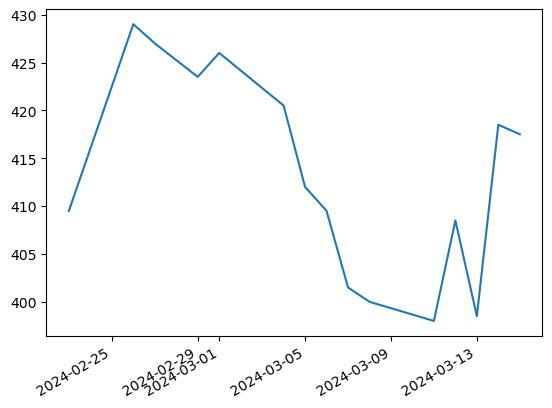

In [8]:
GSEO = {
    'close':_close.dropna().astype(float),
    'open':_open.dropna().astype(float),
    'high':_high.dropna().astype(float),
    'low':_low.dropna().astype(float),
    'volume': _volume.dropna().astype(float),
}

GSEO['close'].plot()

In [9]:
def crawl_index(date):
    
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=IND')
    
    csv_data = StringIO(r.text)
    ret = pd.read_csv(csv_data, header=None, skiprows=1)
    # ret = ret.set_index('指數')
    
    ret = ret.drop(ret.index[268:])
    
    ret.reset_index()
    ret = ret.iloc[:, :-1]
    ret.columns = ret.iloc[0]
    ret = ret.drop(0)
    
    # ret = ret.set_index('指數')
    
    # print(ret)
    
    return ret


index_df = crawl_index(datetime.datetime.now() - datetime.timedelta(days = 2))
index_df_dict = index_df["指數"].to_dict()
"""
index_df.reset_index()
index_df = index_df.iloc[:, :-1]
index_df
index_df.columns = index_df.iloc[0]
index_df = index_df.drop(0)
index_df
index_df = index_df.set_index(['指數'])
index_df
"""

# selected_rows = index_df.loc[["光電類指數"]]
# selected_rows

"\nindex_df.reset_index()\nindex_df = index_df.iloc[:, :-1]\nindex_df\nindex_df.columns = index_df.iloc[0]\nindex_df = index_df.drop(0)\nindex_df\nindex_df = index_df.set_index(['指數'])\nindex_df\n"

In [10]:
data_index = {}
n_days = 10
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5

while len(data_index) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data_index[date.date()] = crawl_index(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    # time.sleep(5)

parsing 2024-03-16 15:42:49.965073
fail! check the date is holiday
parsing 2024-03-15 15:42:49.965073
success!
parsing 2024-03-14 15:42:49.965073
success!
parsing 2024-03-13 15:42:49.965073
success!
parsing 2024-03-12 15:42:49.965073
success!
parsing 2024-03-11 15:42:49.965073
success!
parsing 2024-03-10 15:42:49.965073
fail! check the date is holiday
parsing 2024-03-09 15:42:49.965073
fail! check the date is holiday
parsing 2024-03-08 15:42:49.965073
success!
parsing 2024-03-07 15:42:49.965073
success!
parsing 2024-03-06 15:42:49.965073
success!
parsing 2024-03-05 15:42:49.965073
success!
parsing 2024-03-04 15:42:49.965073
success!


In [11]:
_index_close = pd.DataFrame({k:d['收盤指數'] for k,d in data_index.items()}).transpose()
_index_close.index = pd.to_datetime(_index_close.index)
_index_close = _index_close.rename(columns=index_df_dict)
_index_close

_index_close = pd.concat([_index_close['光電類指數']['2024'], _index_close['光電類指數']['2023']])
# _index_close.dropna().astype(float).plot()

<Axes: >

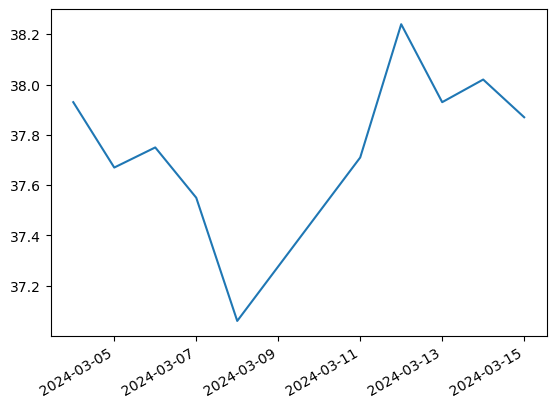

In [12]:
Index_Abstract = {
    'close':_index_close.dropna().astype(float),
}

Index_Abstract['close'].plot()

len: 14
price change in percentage: [0.23952095808383234, -4.778972520908005, 2.5094102885821834, -2.570379436964504, 0.5025125628140703, 0.375, 1.9925280199252802, 0.6105006105006106, 2.063106796116505, 1.3079667063020213, -0.5868544600938966, 0.8264462809917356, 0.468384074941452, -4.545454545454546]




C:\Users\James Lee\.conda\envs\ta-lib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


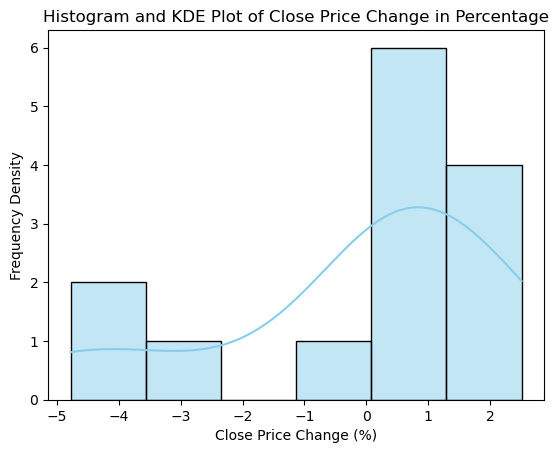

Standard Deviation of Daily Close Price Changes 2.2076387687049936  %
len: 9
price change in percentage: [0.3960918933192651, -0.2367175170962741, 0.817295017136837, -1.3859832635983294, -1.7236807212940828, 1.3221802482460736, 0.5326231691078638, -0.21192052980131998, 0.6902044066896681]




C:\Users\James Lee\.conda\envs\ta-lib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


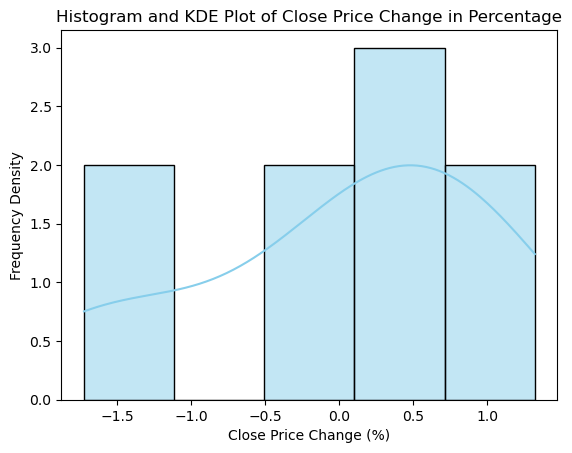

Standard Deviation of Daily Close Price Changes 0.9615734714746136  %


In [13]:
# calculate price change in relative

def calculate_standard_deviance(close_prices):
    
    # print(f"close_prices: {close_prices}", end="\n")
    
    price_changes_percentage = [(price - close_prices[i-1]) / close_prices[i-1] * 100 for i, price in enumerate(close_prices)][1:]
    
    print(f"len: {len(price_changes_percentage)}", end='\n')
    print(f"price change in percentage: {price_changes_percentage}", end='\n\n\n')
    
    sns.histplot(price_changes_percentage, kde=True, color='skyblue')
    plt.title('Histogram and KDE Plot of Close Price Change in Percentage')
    plt.xlabel('Close Price Change (%)')
    plt.ylabel('Frequency Density')
    plt.show()
    
    std_dev_price_changes_percentage = np.std(price_changes_percentage)
    
    print(f"Standard Deviation of Daily Close Price Changes {std_dev_price_changes_percentage}  %", end="\n")

calculate_standard_deviance(GSEO['close'].to_numpy())
calculate_standard_deviance(Index_Abstract['close'].to_numpy())

In [14]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = GSEO['close'].index
    return ret;

<Axes: >

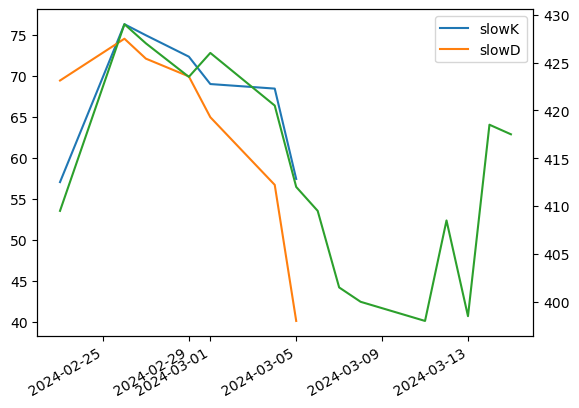

In [15]:
talib_df = talib2df(abstract.STOCH(GSEO))
talib_df.rename(columns = {0:'slowK', 1:'slowD'}, inplace = True) 
talib_df.plot()
GSEO['close'].plot(secondary_y=True)
# orange: K, blue:   D

In [16]:
# get KD cross for K break D

points = []
length_KD = len(talib_df['slowK'])

K = talib_df['slowK']
D = talib_df['slowD']

for i in range(length_KD):
    if (K[i] >= D[i]) and (K[i]>K[i-1]):
        points.append(i)

print(f"points: {points}", end='\n')
        
temps = points
length = len(points)
buy_points = []
flag = True

buy_points.append(points[0])

for i in range(1, length):
    
    if(points[i] == points[i-1]+1):
        continue
    else:
        buy_points.append(points[i])
        
print(f"buy_points: {buy_points}", end='\n')

buy_points_to_column = [0] * length_KD

for i in range(len(buy_points)):
    buy_points_to_column[buy_points[i]] = 100

print(f"buy_points_to_column: {buy_points_to_column}", end='\n\n\n')

for i in range(len(buy_points)):
    print( talib_df.index[ buy_points[i] ] )

points: [9, 10, 11, 12, 13]
buy_points: [9]
buy_points_to_column: [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0]


2024-03-04 00:00:00


C:\Users\James Lee\AppData\Local\Temp\ipykernel_17988\1487681176.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (K[i] >= D[i]) and (K[i]>K[i-1]):


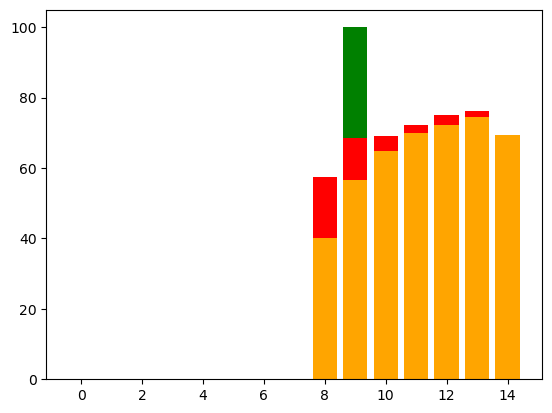

In [17]:
length_KD = len(talib_df['slowK'])

x = range(0,length_KD)

plt.bar(x , buy_points_to_column, color='green')
plt.bar(x , K, color='red')
plt.bar(x , D, color='orange')
plt.show()

In [18]:
# beta, be cautious with weight

In [19]:
# get KD cross for D break K

In [20]:
# get stock book value vs market value

In [21]:
# get cost of capitcal = cost of equity(CAPM, https://www.investopedia.com/investing/calculating-equity-risk-premium/) 
#     + cost of debt(default spread(EBIT/interest expense))

In [22]:
# DCF with beta, risk calculation, discount rate, margin of safety, 
# cash flow estimation, OCF+ICF+FCF
# use retension ratio * reinventment money to estimate growth rate
# terminal value

In [23]:
# relative valuation
# average v.s. median, statistic analysis, implicit assumption,  consistency
# P/E ratio, low P/E, high growth. high return, use regression to get coefficient for P/E ratio(like growth and risk),
# and get the true P/E

# EV/EBIDTA